# Creating and Backtesting simple Momentum/Contrarian Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [3]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


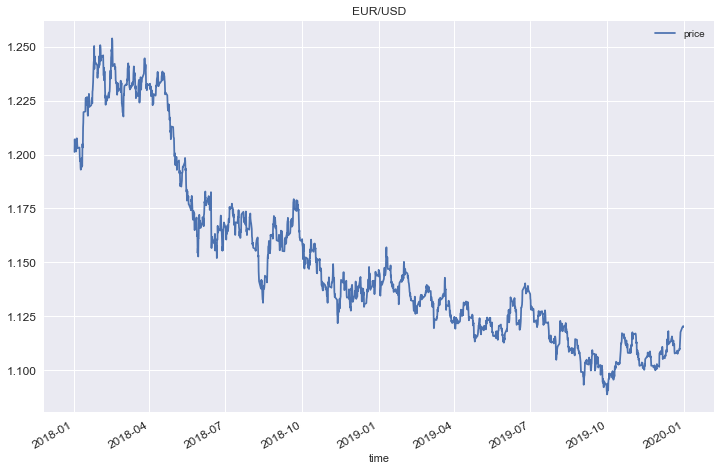

In [5]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

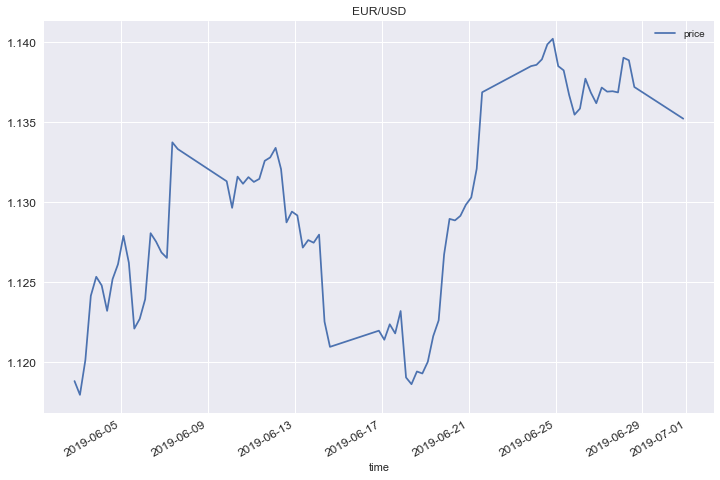

In [6]:
data.loc["2019-06"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [7]:
data["returns"] = np.log(data.div(data.shift(1)))

In [8]:
data.dropna(inplace = True)

In [9]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


## Defining a simple Contrarian Strategy (window = 3)

In [10]:
window = 3

In [11]:
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [12]:
data["returns"].rolling(window).mean()

time
2018-01-02 04:00:00+00:00             NaN
2018-01-02 10:00:00+00:00             NaN
2018-01-02 16:00:00+00:00    1.272676e-03
2018-01-02 22:00:00+00:00   -6.537454e-04
2018-01-03 04:00:00+00:00   -1.702470e-04
                                 ...     
2019-12-29 22:00:00+00:00    1.808598e-03
2019-12-30 04:00:00+00:00    1.085156e-03
2019-12-30 10:00:00+00:00    7.492899e-04
2019-12-30 16:00:00+00:00   -1.484453e-17
2019-12-30 22:00:00+00:00    1.234956e-04
Name: returns, Length: 2069, dtype: float64

In [13]:
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # contrarian (minus sign)

In [14]:
data

,price,returns,position
time,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0


## Vectorized Strategy Backtesting

In [15]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [16]:
data

,price,returns,position,strategy
time,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


In [17]:
data.dropna(inplace = True)

In [18]:
data

,price,returns,position,strategy
time,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


In [19]:
data[["returns", "strategy"]].sum()

returns    -0.073498
strategy    0.096236
dtype: float64

In [20]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.929138
strategy    1.101019
dtype: float64

In [21]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [22]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


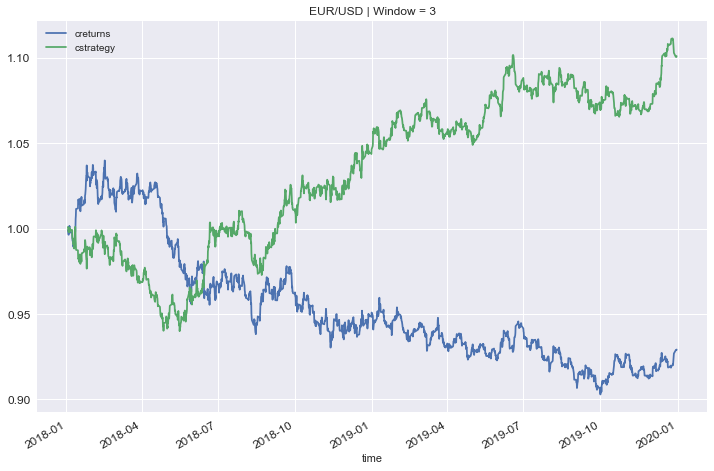

In [23]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8),
                                     title = "EUR/USD | Window = {}".format(window), fontsize = 12)
plt.show()

## Changing the window parameter

In [24]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [25]:
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [26]:
data["returns"] = np.log(data.div(data.shift(1)))

In [27]:
data.dropna(inplace = True)
data

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [28]:
to_plot = ["returns"]

In [29]:
for w in [1, 2, 3, 5, 10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))

In [30]:
data

,price,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.001129,1.0,-0.001129,-1.0,NaN,NaN,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,-1.0,-0.000921,1.0,0.000921,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.000718,1.0,-0.000718,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138


In [31]:
to_plot

['returns', 'strategy1', 'strategy2', 'strategy3', 'strategy5', 'strategy10']

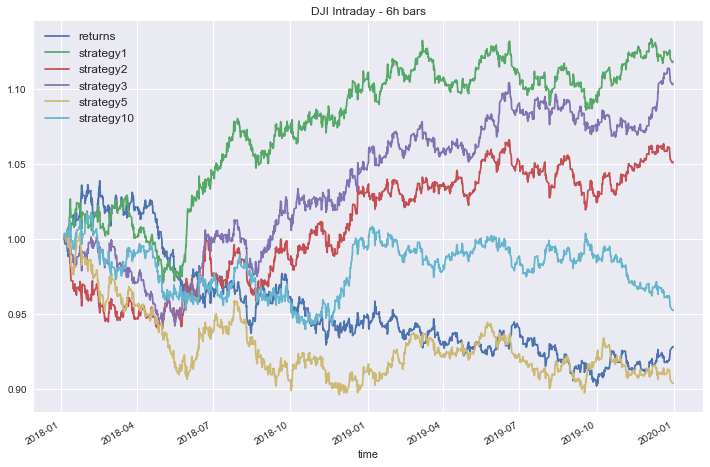

In [32]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.title("DJI Intraday - 6h bars", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [33]:
data

,price,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.001129,1.0,-0.001129,-1.0,NaN,NaN,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,-1.0,-0.000921,1.0,0.000921,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.000718,1.0,-0.000718,-1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138,-1.0,-0.000138


## Trades and Trading Costs (Part 1)

In [34]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [35]:
window = 3

In [36]:
data["returns"] = np.log(data.div(data.shift(1)))

In [37]:
data["position"] = -np.sign(data["returns"].rolling(window).mean())

In [38]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [39]:
data

,price,returns,position,strategy
time,,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138


In [40]:
data.dropna(inplace = True)

In [41]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [42]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


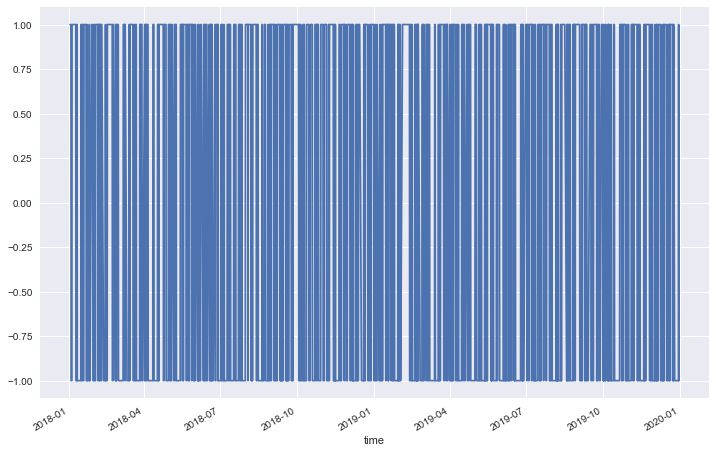

In [43]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

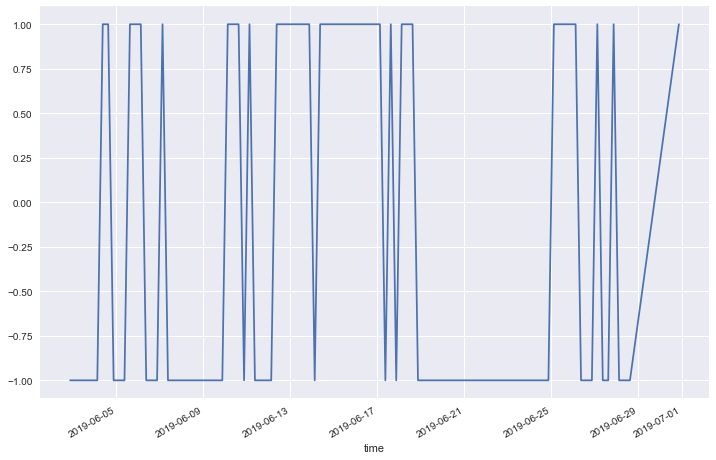

In [44]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show()

__Trading/Transaction Costs__ (simplified)

In [45]:
spread = 1.5 * 0.0001 # pips == fourth price decimal
spread

0.00015000000000000001

In [54]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread

7.500000000000001e-05

In [55]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

6.520065892008915e-05

In [48]:
ptc = 0.00007

In [49]:
data

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420


In [50]:
data.position.diff().fillna(0).abs()

time
2018-01-02 22:00:00+00:00    0.0
2018-01-03 04:00:00+00:00    0.0
2018-01-03 10:00:00+00:00    0.0
2018-01-03 16:00:00+00:00    0.0
2018-01-03 22:00:00+00:00    0.0
                            ... 
2019-12-29 22:00:00+00:00    0.0
2019-12-30 04:00:00+00:00    0.0
2019-12-30 10:00:00+00:00    0.0
2019-12-30 16:00:00+00:00    2.0
2019-12-30 22:00:00+00:00    2.0
Name: position, Length: 2066, dtype: float64

In [51]:
data["trades"] = data.position.diff().fillna(0).abs()

In [52]:
data

,price,returns,position,strategy,creturns,cstrategy,trades
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420,0.0


In [53]:
data.trades.value_counts()

0.0    1513
2.0     553
Name: trades, dtype: int64

## Trades and Trading Costs (Part 2)

In [56]:
data

,price,returns,position,strategy,creturns,cstrategy,trades
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420,0.0


In [57]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [58]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [59]:
data

,price,returns,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
time,,,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0,0.000921,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0,-0.000718,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0,-0.001222,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0,-0.000757,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0,0.000004,0.998229
...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591,0.0,-0.002092,1.024287
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572,0.0,-0.000018,1.024269
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420,0.0,-0.000138,1.024127


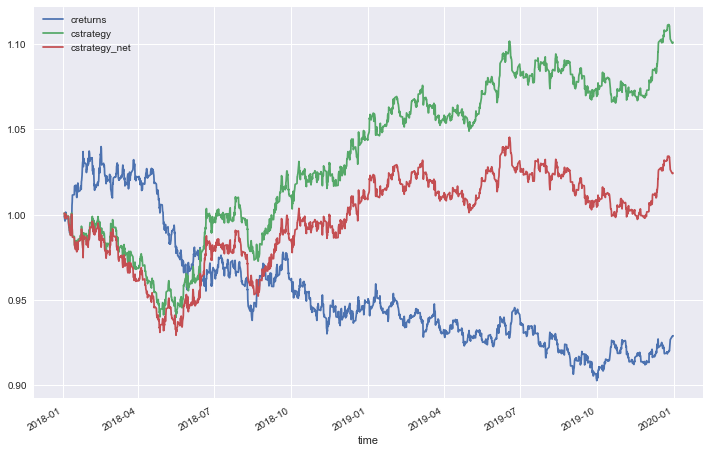

In [60]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()